In [1]:
import scipy.io
import numpy as np
import operator as op

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt # matplotlib
matplotlib.rcParams['figure.figsize'] = list(map(lambda x: 2*x, matplotlib.rcParams['figure.figsize']))
matplotlib.style.use('ggplot')

In [3]:
data = scipy.io.loadmat('../../data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'bin', 'data1_Xian', 'label1', 'spotColumn1_Xian', 'spotRow1_Xian'])

In [7]:
mz_values = data['bin'].T

In [21]:
mz_values

array([[  1996.95878277],
       [  1998.24538575],
       [  1999.53198872],
       ..., 
       [ 20005.54064941],
       [ 20006.82725239],
       [ 20008.11385537]])

In [13]:
coorX = data['spotRow1_Xian'][0]
coorX

array([136, 135, 137, ...,  90,  92,  91], dtype=uint8)

In [15]:
coorY = data['spotColumn1_Xian'][0]
coorY

array([166, 166, 166, ..., 125, 125, 125], dtype=uint8)

In [16]:
coorX -= coorX.min()
coorY -= coorY.min()

nrows = coorX.max() + 1
ncols = coorY.max() + 1

In [22]:
data_cube = np.zeros((nrows, ncols, mz_values.shape[0]))
data_cube[coorX, coorY, :] = data["data1_Xian"]

data_matrix = data['data1_Xian']
data_matrix.shape

(9577, 14000)

In [23]:
row2grid = {r: (coorX[r], coorY[r]) for r in range(data_matrix.shape[0])}
grid2row = {(coorX[r], coorY[r]): r for r in range(data_matrix.shape[0])}

get_bin = lambda mz: np.argmin(np.abs(mz_values - mz))

real_rows = []
real_rows_xy = []
for r in range(nrows):
    for c in range(ncols):
        try:
            row = grid2row[(r, c)]
            real_rows_xy.append((r, c))
            real_rows.append(row)
        except:
            pass
        
real_rows = np.array(real_rows)
real_rows.shape

real_rows_xy = np.array(np.array(real_rows_xy))
real_rows_xy.shape

(9577, 2)

In [24]:
def make_image(rows): # very inefficient implementation but doesnt matter
    """Makes a 2d image from row indices in raw data."""
    img = np.zeros((nrows, ncols))    
    for r in range(nrows):
        for c in range(ncols):
            try:
                row = grid2row[(r, c)]
                img[r, c] = rows[row]
            except:
                pass
    return img

def make_image_real(rows):
    """Makes a 2d image from real rows with data (i.e., rows in real_rows)."""
    img = np.zeros((nrows, ncols)) 
    for idx, val in enumerate(rows):
        x, y = real_rows_xy[idx]
        img[x, y] = val
    return img

/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


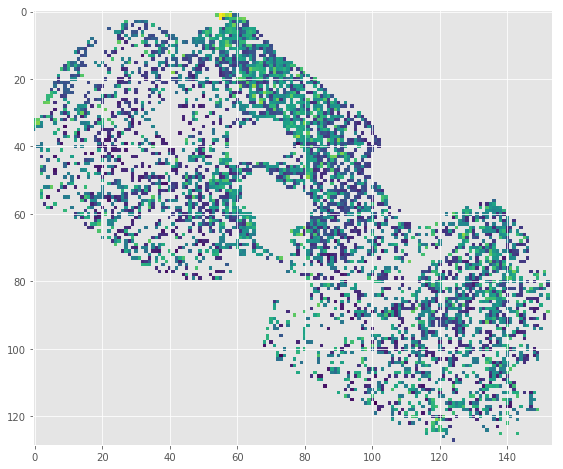

In [31]:
insulin_bin_idx = get_bin(5000) # human insulin protein has molecular mass 5808 Da
#plt.imshow(data_cube[:,:, insulin_bin_idx])

insulin_img = make_image(data_matrix[:, insulin_bin_idx])
plt.imshow(np.log10(insulin_img)) # log10 changes the distribution so we can see what's going on better

/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


ValueError: range parameter must be finite.

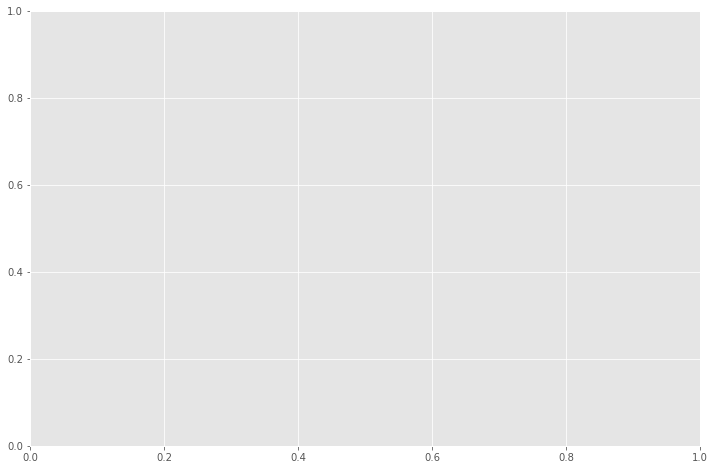

In [32]:
plt.hist(np.log10(data_matrix[:, insulin_bin_idx]), bins=50)